In [1]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import yaml
import cv2
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, f1_score

In [9]:

import glob
import cv2

image_dir = '../dataset/images'
imgPath = []
for img in glob.glob(image_dir+'/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print((imgPath))


['../dataset/images/ISIC_0032832.jpg', '../dataset/images/ISIC_0025961.jpg', '../dataset/images/ISIC_0027125.jpg', '../dataset/images/ISIC_0032612.jpg', '../dataset/images/ISIC_0030418.jpg', '../dataset/images/ISIC_0028021.jpg', '../dataset/images/ISIC_0026957.jpg', '../dataset/images/ISIC_0034185.jpg', '../dataset/images/ISIC_0029868.jpg', '../dataset/images/ISIC_0029824.jpg', '../dataset/images/ISIC_0025804.jpg', '../dataset/images/ISIC_0031811.jpg', '../dataset/images/ISIC_0025307.jpg', '../dataset/images/ISIC_0025081.jpg', '../dataset/images/ISIC_0027402.jpg', '../dataset/images/ISIC_0032608.jpg', '../dataset/images/ISIC_0024517.jpg', '../dataset/images/ISIC_0027260.jpg', '../dataset/images/ISIC_0025862.jpg', '../dataset/images/ISIC_0031848.jpg', '../dataset/images/ISIC_0031639.jpg', '../dataset/images/ISIC_0024738.jpg', '../dataset/images/ISIC_0026574.jpg', '../dataset/images/ISIC_0027684.jpg', '../dataset/images/ISIC_0032977.jpg', '../dataset/images/ISIC_0028133.jpg', '../dataset

0025961


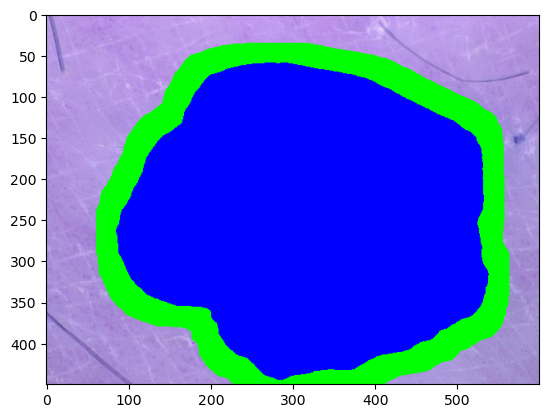

In [ ]:
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# im_n = imgPath
image_dir = '../dataset/images'

imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}
im_n=['../dataset/images/ISIC_0025961.jpg']
for i in range(1):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(ll)
    # print(str(labelPath), type(ll))
    imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    # Image.open
    # mask = Image.load_img(labelPath, color_mode='grayscale')
    # mask = Image.open(labelPath)
    mask = cv2.imread(labelPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) 

    # mask = Image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    # im = image.load_img(im_n[i], target_size=(224, 224))
    # im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    # plt.imshow(img_with_contours)
    # plt.show()

    m = cv2.imread(labelPath, 0) 
    d = 50
    kernel = np.ones((d, d), np.uint8) 
    img_dilation = cv2.dilate(m, kernel, iterations=1) 
    # cv2.imshow('Dilation', img_dilation) 
    mask_contours_d, _ = cv2.findContours((img_dilation * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_with_contours, mask_contours_d, -1, (0, 255, 0), -1)
    cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), -1)

    plt.imshow(img_with_contours)
    plt.show()
    # plt.imsave('../'+im_n[i].split('_')[1].split('.')[0]+'_mask_ring_'+str(d)+'.jpg', img_with_contours)





In [40]:
imgPath = []
for img in glob.glob('../dataset/images/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print((imgPath))
print(len(imgPath))



['../dataset/images/ISIC_0032832.jpg', '../dataset/images/ISIC_0025961.jpg', '../dataset/images/ISIC_0027125.jpg', '../dataset/images/ISIC_0032612.jpg', '../dataset/images/ISIC_0030418.jpg', '../dataset/images/ISIC_0028021.jpg', '../dataset/images/ISIC_0026957.jpg', '../dataset/images/ISIC_0034185.jpg', '../dataset/images/ISIC_0029868.jpg', '../dataset/images/ISIC_0029824.jpg', '../dataset/images/ISIC_0025804.jpg', '../dataset/images/ISIC_0031811.jpg', '../dataset/images/ISIC_0025307.jpg', '../dataset/images/ISIC_0025081.jpg', '../dataset/images/ISIC_0027402.jpg', '../dataset/images/ISIC_0032608.jpg', '../dataset/images/ISIC_0024517.jpg', '../dataset/images/ISIC_0027260.jpg', '../dataset/images/ISIC_0025862.jpg', '../dataset/images/ISIC_0031848.jpg', '../dataset/images/ISIC_0031639.jpg', '../dataset/images/ISIC_0024738.jpg', '../dataset/images/ISIC_0026574.jpg', '../dataset/images/ISIC_0027684.jpg', '../dataset/images/ISIC_0032977.jpg', '../dataset/images/ISIC_0028133.jpg', '../dataset

In [41]:
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}

for i in range(len(im_n)):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(i, ll)
    # print(str(labelPath), type(ll))
    imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    # labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    im_1 =  sitk.ReadImage(imagePAth)
    single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
    extractor = featureextractor.RadiomicsFeatureExtractor(params)
    extractor.disableAllFeatures()
    # extractor.enableAllFeatures()
    extractor.enableFeatureClassByName('firstorder', 'shape2D')
    extractor.enableFeatureClassByName( 'ngtdm')
    extractor.enableFeatureClassByName('gldm')
    extractor.enableFeatureClassByName('glszm','glrlm')

    # result = extractor.execute(single_channel_image, mask_1)
    features[i] = extractor.execute ( single_channel_image,labelPath)
    
    # plt.imshow(img_with_contours)
    # plt.show()
    # plt.imsave(image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_mask.jpg', img_with_contours)
    # plt.imsave(image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg', t)


0 0032832
1 0025961
2 0027125
3 0032612
4 0030418
5 0028021
6 0026957
7 0034185
8 0029868
9 0029824
10 0025804
11 0031811
12 0025307
13 0025081


/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/radiomics/imageoperations.py:125: RuntimeWarning: overflow encountered in scalar add
  highBound = maximum + 2 * binWidth
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/radiomics/imageoperations.py:127: RuntimeWarning: overflow encountered in scalar subtract
  binEdges = numpy.arange(lowBound, highBound, binWidth)


14 0027402
15 0032608
16 0024517
17 0027260
18 0025862
19 0031848
20 0031639
21 0024738
22 0026574
23 0027684
24 0032977
25 0028133
26 0024596
27 0032811
28 0029833
29 0033929
30 0025654
31 0030481
32 0025805
33 0029311
34 0031286
35 0032918
36 0032757
37 0032702
38 0024814
39 0028726
40 0028202
41 0025992
42 0026851
43 0029996
44 0032985
45 0029087
46 0027592
47 0026959
48 0028681
49 0025120
50 0029652
51 0032767
52 0024635
53 0027570
54 0033608
55 0032385
56 0027407
57 0027090
58 0029668
59 0032220
60 0032838
61 0024362
62 0031427
63 0031976
64 0024421
65 0029000
66 0031279
67 0033158
68 0024871
69 0029650
70 0031608
71 0032705
72 0031810
73 0024331
74 0033385
75 0025200
76 0026725
77 0024903
78 0027720
79 0027819
80 0032473
81 0025495
82 0031176
83 0024412
84 0027888
85 0028378
86 0030049
87 0026062
88 0027442
89 0025385
90 0028008
91 0028655
92 0032216
93 0029669
94 0024413
95 0029239
96 0029518
97 0030546
98 0024717
99 0029079
100 0032851
101 0025829
102 0031198
103 0027235
104 00

In [ ]:
# import yaml

# params_path = os.path.join(os.getcwd(), 'Params.yaml')
# with open(params_path, 'r') as file:
#     params = yaml.safe_load(file)

# features ={}

# # im_n = imgPath
# for i in range(len(im_n)):
#     print(i,im_n[i])

#     maskpath_1 =image_dir+'/contoured/'+im_n[i].split('_')[1].split('.')[0]+'_mask.jpg'
#     # maskpath_1 ='../dataset/mask_ring/'+im_n[i].split('_')[0].split('/')[-1]+'_mask.jpg'
    

#     # print(maskpath_1)
#     # impath_1 =image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg'
#     impath_1 =image_dir+'/contoured/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg'

#     mask_1 = sitk.ReadImage(maskpath_1)
#     im_1 = sitk.ReadImage(impath_1)
#     single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
#     extractor = featureextractor.RadiomicsFeatureExtractor(params)
#     extractor.disableAllFeatures()
#     # extractor.enableAllFeatures()
#     extractor.enableFeatureClassByName('firstorder', 'shape2D')
#     extractor.enableFeatureClassByName( 'ngtdm')
#     extractor.enableFeatureClassByName('gldm')
#     extractor.enableFeatureClassByName('glszm','glrlm')

#     # result = extractor.execute(single_channel_image, mask_1)
#     features[i] = extractor.execute ( single_channel_image, mask_1)
    
# # A list of the valid features, sorted
# # feature_names = list(sorted( features[1]))


0 ../dataset/images/ISIC_0025961.jpg


ValueError: Label (255) not present in mask. Choose from [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  57  59  61  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 228 229 230 231 232 236]

In [42]:
feature_names = list(sorted(filter ( lambda k: k.startswith('original_'), features[1] )))


(9999, 53)


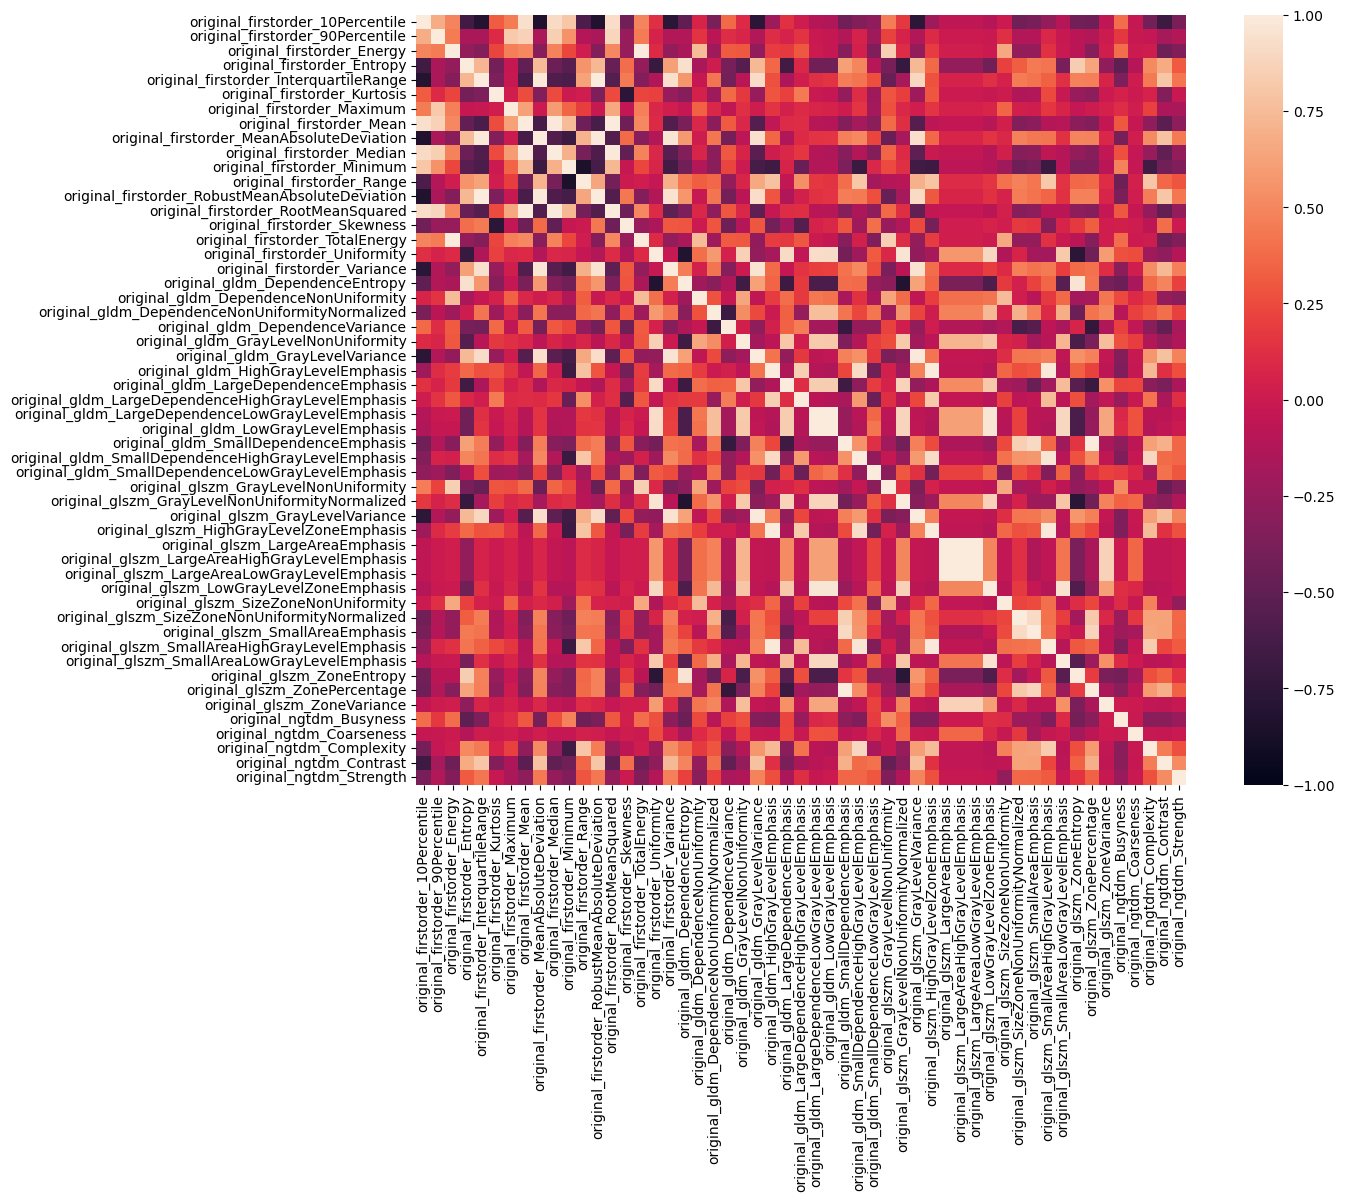

In [43]:
# import seaborn as sns
# import matplotlib.pyplot as plt

samples = np.zeros((len(im_n),len(feature_names)))
print(samples.shape)

for i in range(1,len(im_n)):
    # print(i)
    a = np.array([])
    
    for feature_name in feature_names:
        a = np.append(a, features[i][feature_name])
        # print(a)
    # print(a.shape)
    samples[i,:] = a
# print(samples)  
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)
# d.to_csv('../dataset/PyRadiomics_files/radiomics_lesion.csv', index=False)
corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))


# Draw the heatmap using seaborn
sns.heatmap(corr, vmin= -1, vmax=1, square = True)
# plt.savefig('../presentation/heatmap.png', dpi= 100)
plt.show()

In [44]:
data_pd = pd.read_csv('../dataset/metadata/HAM10000_metadata.csv')
data_pd.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [45]:
dp = data_pd[['image_id', 'dx']]
dp

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl
...,...,...
10010,ISIC_0033084,akiec
10011,ISIC_0033550,akiec
10012,ISIC_0033536,akiec
10013,ISIC_0032854,akiec


In [46]:
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032214'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032215'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025277'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029819'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0034047'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029609'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025061'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028361'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0026042'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030687'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025987'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030006'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0031070'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028110'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033377'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033031'].index, inplace = True)

# print(data_pd)
d_radiomics = dp.merge(d.set_index(data_pd['image_id']), on = 'image_id')
d_radiomics.to_csv('../dataset/PyRadiomics_files/radiomics_lesion.csv', index=False)

X = d_radiomics.drop(['image_id', 'dx'], axis = 1)
dp = data_pd[['image_id', 'dx']]
print(dp)
y = d_radiomics['dx']

           image_id     dx
0      ISIC_0027419    bkl
1      ISIC_0025030    bkl
2      ISIC_0026769    bkl
3      ISIC_0025661    bkl
4      ISIC_0031633    bkl
...             ...    ...
10010  ISIC_0033084  akiec
10011  ISIC_0033550  akiec
10012  ISIC_0033536  akiec
10013  ISIC_0032854  akiec
10014  ISIC_0032258    mel

[9999 rows x 2 columns]


In [143]:
d

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,107.0,137.0,3557496.0,4.354574,17.0,2.615393,152.0,120.180328,9.738914,117.0,...,156.211623,0.018979,4.630155,0.934426,0.065251,0.015971,0.303106,68.975642,0.021716,104.498722
2,129.7,167.6,1065149.0,4.264461,17.0,9.732406,179.0,143.312500,23.947917,154.0,...,5276.855556,0.066832,4.413424,0.937500,0.062222,0.000436,1.777778,51.921465,0.239080,5090.220238
3,149.0,180.0,4621302.0,4.243709,18.0,2.014269,187.0,162.563218,9.840666,159.0,...,163.403545,0.025670,4.364714,0.936782,0.148820,0.007688,0.656604,25.352866,0.016784,166.041797
4,124.4,176.0,4124369.0,5.129641,24.0,9.803453,203.0,144.535135,21.943141,148.0,...,5623.333563,0.001895,5.251234,0.940541,0.128187,0.000780,0.416667,479.647574,0.143510,1020.718024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,162.0,179.0,3792681.0,3.632915,8.0,2.456005,186.0,170.684615,5.196331,171.0,...,61.585776,0.050241,4.171023,0.823077,0.411739,0.017379,0.677083,11.418326,0.012861,52.570136
10004,150.8,186.0,4156254.0,4.545264,15.0,2.729632,196.0,166.536913,10.092338,166.0,...,264.003546,0.018501,4.726882,0.946309,0.110256,0.003947,0.741294,59.968181,0.018660,234.270374
10005,93.0,132.7,3718188.0,4.862995,20.0,3.160093,164.0,115.386861,12.599499,117.0,...,548.747148,0.008879,5.049648,0.959854,0.040076,0.008028,0.120758,549.992547,0.057597,88.082633
10006,147.0,167.2,5649795.0,4.042405,10.0,3.788893,181.0,156.825328,6.593543,157.0,...,213.725113,0.018040,4.235276,0.965066,0.034889,0.012668,0.210672,66.208731,0.016282,63.892486


In [157]:
# X.isnull().sum()

In [158]:
# y = d_radiomics['dx']
# y

In [159]:
# from sklearn.feature_selection import SelectKBest

# from sklearn.feature_selection import f_regression

# # define number of features to keep

# d['original_firstorder_RobustMeanAbsoluteDeviation'] = d['original_firstorder_RobustMeanAbsoluteDeviation'].fillna(0)

# k = 10

# # perform feature selection

# X_new = SelectKBest(f_regression, k=k).fit_transform(d, y)

# # get feature names of selected features

# selected_features = d.columns[SelectKBest(f_regression, k=k).fit(d, y).get_support()]

# # print selected features

# print(selected_features)

In [160]:
codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

y = y.map(codes) 


In [121]:
from imblearn.over_sampling import RandomOverSampler    # to balance an imbalanced dataset.
# Initializing the RandomOverSampler object with a specified random_state for reproducibility.
ROS = RandomOverSampler(random_state = 42)

# This method generates a balanced dataset by oversampling the minority class
x_resampled, y_resampled = ROS.fit_resample(X, y)


In [122]:
x_resampled['original_firstorder_RobustMeanAbsoluteDeviation'] = x_resampled['original_firstorder_RobustMeanAbsoluteDeviation'].fillna(0)

In [123]:
x_resampled.isnull().sum()

original_firstorder_10Percentile                      0
original_firstorder_90Percentile                      0
original_firstorder_Energy                            0
original_firstorder_Entropy                           0
original_firstorder_InterquartileRange                0
original_firstorder_Kurtosis                          0
original_firstorder_Maximum                           0
original_firstorder_Mean                              0
original_firstorder_MeanAbsoluteDeviation             0
original_firstorder_Median                            0
original_firstorder_Minimum                           0
original_firstorder_Range                             0
original_firstorder_RobustMeanAbsoluteDeviation       0
original_firstorder_RootMeanSquared                   0
original_firstorder_Skewness                          0
original_firstorder_TotalEnergy                       0
original_firstorder_Uniformity                        0
original_firstorder_Variance                    

In [124]:
from sklearn.model_selection import train_test_split
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)


In [125]:
from sklearn.preprocessing import StandardScaler

#scaling and centering the data
sc = StandardScaler()
X_train_scaled_n = sc.fit_transform(X_train_n)
X_test_scaled_n = sc.transform(X_test_n)

In [126]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [127]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [128]:
svm.fit(X_train_scaled_n,y_train_n.values)


SVC(gamma=0.5)

In [129]:

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

8446 8446 939 939
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       126
           1       0.68      0.83      0.75       123
           2       0.68      0.54      0.60       145
           3       0.97      1.00      0.98       138
           4       0.75      0.58      0.65       130
           5       0.44      0.48      0.46       132
           6       0.94      1.00      0.97       145

    accuracy                           0.76       939
   macro avg       0.75      0.75      0.75       939
weighted avg       0.75      0.76      0.75       939



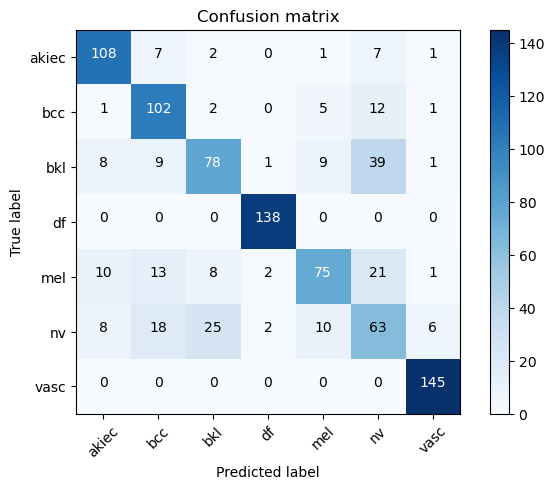

In [130]:
x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
svm.fit(x_val_n, y_val_n.values)
y_pre_nn = svm.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
# xp = classification_report(y_test_nn,y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
plt.savefig('../presentation/conf_mat_svm_rbf_d_50.png', dpi = 100)
plt.show()

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Perform cross-validation for different values of k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,3,55]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_n, y_train_n.values)
    scores = cross_val_score(knn, X_train_scaled_n, y_train_n, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())
    # print(cv_scores)

# Find the optimal value of k
optimal_k = k_values[cv_scores.index(max(cv_scores))]   

In [132]:
best_cv_score = cv_scores[cv_scores.index(max(cv_scores))] 


In [133]:
knn = KNeighborsClassifier(n_neighbors=1)


              precision    recall  f1-score   support

           0       0.83      0.98      0.90       126
           1       0.81      0.95      0.88       123
           2       0.70      0.72      0.71       145
           3       0.94      1.00      0.97       138
           4       0.74      0.72      0.73       130
           5       0.58      0.30      0.40       132
           6       0.95      1.00      0.97       145

    accuracy                           0.81       939
   macro avg       0.79      0.81      0.79       939
weighted avg       0.79      0.81      0.79       939



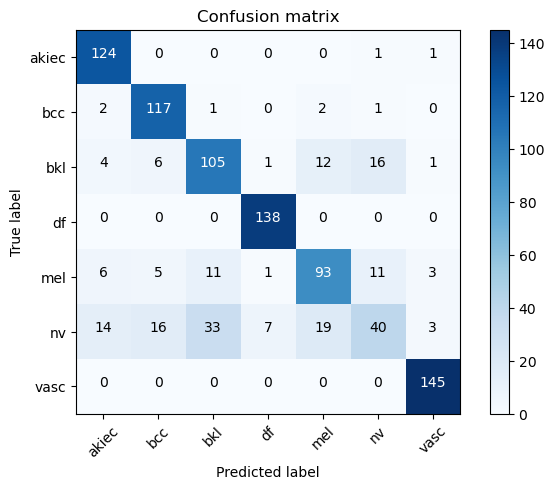

In [134]:
# knn.fit(X_train_scaled_n, y_train_n.values)
knn.fit(x_val_n, y_val_n.values)
y_pre_nn = knn.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
# xp = classification_report(y_test_nn,y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
plt.savefig('../presentation/conf_mat_knn_1_d_50.png', dpi = 100)
plt.show()

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [136]:
clf = RandomForestClassifier( random_state=42)

In [137]:
param_grid = { 
    # 'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,4,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
# .fit(x_train, y_train)

# xp = classification_report(y_test_nn,y_pre_nn)

# clf.fit(X, y)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       126
           1       0.86      0.93      0.90       123
           2       0.74      0.72      0.73       145
           3       0.99      1.00      1.00       138
           4       0.72      0.77      0.75       130
           5       0.59      0.49      0.54       132
           6       0.99      1.00      1.00       145

    accuracy                           0.84       939
   macro avg       0.83      0.84      0.84       939
weighted avg       0.84      0.84      0.84       939



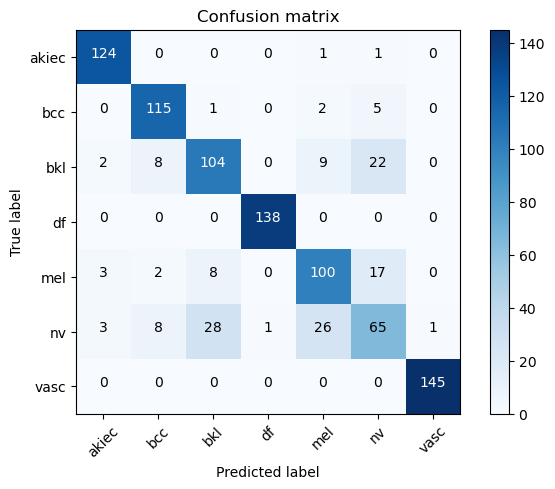

In [142]:
clf.fit(x_val_n, y_val_n.values)
y_pre_nn = clf.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
plt.savefig('../presentation/conf_mat_rfc_d50.png', dpi = 100)
plt.show()

In [139]:
CV_rfc.fit(x_val_n, y_val_n.values)
y_pre_nn = CV_rfc.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)

0.7177848775292864

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       126
           1       0.68      0.76      0.72       123
           2       0.69      0.50      0.58       145
           3       0.75      1.00      0.86       138
           4       0.68      0.67      0.67       130
           5       0.49      0.22      0.30       132
           6       0.80      1.00      0.89       145

    accuracy                           0.72       939
   macro avg       0.69      0.72      0.69       939
weighted avg       0.69      0.72      0.69       939



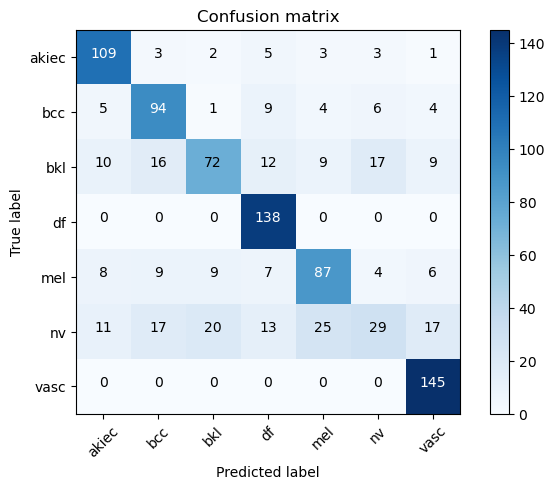

In [140]:
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
plt.savefig('../presentation/conf_mat_rfc_d_50.png', dpi = 100)
plt.show()

In [141]:
_

array([[[-1, -1, -1, -1]]], dtype=int32)